#**PROBLEMA DE NEGOCIO**

Una cadena de Supermercados Online que opera en Brasil quiere obtener insights sobre la venta de sus productos. Para hacer esto, usted, como científico de datos, deberá analizar los pedidos de sus clientes y mostrar gráficamente las respuestas de las siguientes preguntas de negocio:

**Preguntas**


1.  ¿Cuáles son las ventas totales por año?¿Y qué año tuvo mejor desempeño?
2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el periodo?
3. Si separamos las ventas totales por año y por regiones ¿Que insights podemos obtener de nuestras ventas?
4. ¿Cuál es el método de envío mas utilizado por los clientes del Supermercado?¿Es proporcional para B2B Y B2C?
5. ¿Cuáles son las ventas totales por trimestre en el estado de Sao Paulo?
6. ¿Existe otro insight que puedas proporcionar?


##**1.Configuración del ambiente de trabajo**

Verificando las versiones de python, pandas y matplotlib

In [ ]:
# @title
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


Importando librerias de utilidad

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

##**2.Definiendo variables globales**

In [ ]:
global df_ventas, df_ventas_limpio

##**3.Obtención de datos**

Vamos a crear la función obtencion_datos() con la cual vamos:

1. Hallar si el dataframe tiene duplicados, valores nulos, registro de pruebas y  por ultimo registros con ganancias <= 0
2. Limpiar el dataframe de los datos que hallamos.



In [ ]:
# @title
# Vamos a crear la función obtencion_datos()
def obtencion_datos():

  #Definimos la variables globables nuevamente
  global df_ventas, df_ventas_limpio

  # Leemos nuestro dataset para ello usamos el metodo .read_csv()
  df_ventas = pd.read_csv('reporte_ventas.csv', sep=',')

  # Ahora vamos a convertir los datos de la columna fecha_ envio y fecha_pedido en datos datetime, y guardaremos la información en sus mismas columnas respectivamente
  # para realizarlo usaremos el método .to_datetime a cada una de las columnas, especificando el formato que debe seguir con el parámetro format
  df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'],format='%Y-%m-%d')
  df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'],format='%Y-%m-%d')

  # Hallaremos la cantidad de valores duplicados, usaremos el método .duplicated() y procederemos a usar el método suma en la misma linea de codigo, para que nos arroje la cantidad
  # de datos o filas duplicadas, luego procedemos a imprimir dicho valor
  cantidad_duplicados = df_ventas.duplicated().sum()
  print(f"Cantidad de valores duplicados: {cantidad_duplicados}")
  print("--------------------------------")

  # Ahora hallaremos la cantidad de nulos en el sistema, usando el metodo .isna() podemos saber la cantidad de nulos en el sistema, y como al aplicar df_ventas.info()
  # se noto que los valores nulos pertencian a la columna de nombre_cliente hacemos la selección allí, por ultimo en la mis línea de codigo estamos aplicando el método
  # para sumar los valores de dicha columana obteniendo de esta forma la cantidad total de valores nulos para luego proceder a imprimirlos.
  cantidad_nulos = df_ventas["nombre_cliente"].isna().sum()
  print(f"Cantidad de valores nulo {cantidad_nulos}")
  print("--------------------------------")

  # Cantidad de ganancias menores a 0, esto lo haremos seleccionando del dataframe ventas todos los valores menores o iguales a 0 de la columana total_ganancias y aplicando la suma
  # de todo la columna con el método .sum().
  ganancias_menor_0 = (df_ventas["total_ganancia"]<=0).sum()
  print(f"Cantidad de ganancia menor o igual a cero: {ganancias_menor_0}")
  print("--------------------------------")

  # Cantidad de registros que son de prubas es decir que tienen como por nombre pruebas. Para realizar esto seleccionaremos toda la columana nombre_cliente y aplicaremos un
  # condicional el cual nos permitira tener solo las filas que cumple esta condición para luego aplicar el .sum() y de esta manera obtener la cantidad de filas en el dataframe
  # que son de prueba
  registros_de_pruebas = (df_ventas["nombre_cliente"]=="prueba").sum()
  print(f"Cantidad de registros de prueba {registros_de_pruebas}")
  print("--------------------------------")

  # Ahora vamos a proceder con la limpieza de los datos

  # Limpiando valores duplicados con el metodo drop_duplicates() y por ultmio guardandolo en el nuevo dataframe llamado df_ventas_limpio el cual será el dataframe
  # con el cual vamos a trabajar
  df_ventas_limpio = df_ventas.drop_duplicates()

  # Para verificar aplicaremos el método .duplicated() al dataframe nuevo
  cantidad_duplicados = df_ventas_limpio.duplicated().sum()

  # Limpiar datos nulos, y colocamos el atributo inplace=True, para que quede guardado el cambio realizado al dataframe
  df_ventas_limpio.dropna(inplace=True)

  # Limpieza de datos para trabajar con valores con ganancias mayores a 0
  df_ventas_limpio = df_ventas_limpio[(df_ventas_limpio["total_ganancia"]>0)]
  ganancias_menor_0 = (df_ventas_limpio["total_ganancia"]<=0).sum()

  # Limpieza de datos de los registros de prueba
  df_ventas_limpio = df_ventas_limpio[(df_ventas_limpio["nombre_cliente"]!="prueba")]
  registros_de_pruebas = (df_ventas_limpio["nombre_cliente"]=="prueba").sum()
  # Cantidad de valores nulos despues de la limpieza
  cantidad_nulos  = df_ventas_limpio["nombre_cliente"].isna().sum()

  # Por ultimo vamos a proceder a arreglar los indices que han quedado desordenados debido a la limpieza de datos y debido a esto
  # ya no concuerdan con la cantidad de valores restantes, para esto usaremos el metodo reset_index la cual reestablecera el indice
  # a la nueva cantidad de filas que tenemosa, con inplace= True como parametro estaremos realizando el cambio en el dataframe y
  # guardandolo y con el parámetro drop=True estamos especificando que el método no solo haga el reestablecimiento del indice
  # sino que ademas la columana nueva que se genera con el indice viejo ya no se generara.
  df_ventas_limpio.reset_index(inplace=True, drop=True)

  # Cantidad de registros que de pruebas, cantidad de nulos y cantidad ganancias menores o iguales a 0 despues de la limpieza
  print("Cantidad de registros de pruebas, cantidad de nulos, cantidad de valores duplicados y cantidad ganancias menores o iguales a 0 despues de la limpieza: ")
  print("--------------------------------")
  print(f"*Cantidad de valores duplicados: {cantidad_duplicados}")
  print("--------------------------------")
  print(f"*Cantidad de valores nulo: {cantidad_nulos}")
  print("--------------------------------")
  print(f"*Cantidad de ganancia menor o igual a 0: {ganancias_menor_0}")
  print("--------------------------------")
  print(f"*Cantidad de registros de prueba: {registros_de_pruebas}")
  print("--------------------------------")
  return df_ventas_limpio
obtencion_datos()

Cantidad de valores duplicados: 15
--------------------------------
Cantidad de valores nulo 2
--------------------------------
Cantidad de ganancia menor o igual a cero: 1726
--------------------------------
Cantidad de registros de prueba 4
--------------------------------
Cantidad de registros de pruebas, cantidad de nulos, cantidad de valores duplicados y cantidad ganancias menores o iguales a 0 despues de la limpieza: 
--------------------------------
*Cantidad de valores duplicados: 0
--------------------------------
*Cantidad de valores nulo: 0
--------------------------------
*Cantidad de ganancia menor o igual a 0: 0
--------------------------------
*Cantidad de registros de prueba: 0
--------------------------------


<ipython-input-4-80db5600a963>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_limpio.dropna(inplace=True)


,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.0,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.0,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.0,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.1,38.02,2,76.04,4.28
4,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,20.29,23.73,0.0,23.73,7,166.11,24.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Electrónicos,Smartphones,97.34,123.22,0.0,123.22,1,123.22,25.88
7206,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Smartphones,223.01,271.97,0.0,271.97,1,271.97,48.96
7207,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Cámaras digitales,121.23,140.15,0.0,140.15,5,700.75,94.60
7208,2019-01-22,2019-01-24,Económico,Isabel Araújo,B2C,João Pessoa,Paraíba,Noreste,Ropa,Vestidos,26.29,31.79,0.1,28.61,3,85.83,6.96


##**Pregunta 1: ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?**

In [ ]:
def pregunta_1():

  # 1.- Preparación de los datos

  # Creamos una copia del df_ventas_limpio, que guardaremos en df_ventas_limpio_copia
  df_ventas_limpio_copia = df_ventas_limpio.copy()

  # Guardaremos el df_ventas_limpio_copia en el df_ventas_año pero realizando la selección de todas las columnas del df y
  # solamente las columanas "fecha_pedido" y "total_venta" con el metodo de selección .loc()
  df_ventas_año = df_ventas_limpio_copia.loc[:,["fecha_pedido","total_venta"]]

  # Creamos un dataframe que solo alamcene la fecha del pedido
  df_fecha_pedido = df_ventas_limpio["fecha_pedido"]

  # Creamos un dataframe que almacene la fecha del envio del pedido
  df_fecha_envio = df_ventas_limpio["fecha_envio"]

  # Añadimos una nueva columna al dataframe llamada años, y el valor que contentra seran los años de envio, para ello con los valores df_fecha_pedido aplicamos el .dt.year
  # y a este tipo de dato datetime estaremos extrayendo solo el valor del año, aclaramos que  format='%Y-%m-%d' indica year-mounth-day.
  df_ventas_año["años"] = df_fecha_pedido.dt.year
  df_ventas_año = df_ventas_año.loc[:,["total_venta","años"]]

  # Vamos a crear una agrupación con respecto a la columana años
  grupo_años = df_ventas_año.groupby("años")

  # Con el método .agrgregate realizaremos una sumatoria de la columa de total de ventas para cada año
  total_ventas_año = grupo_años.aggregate({"total_venta":"sum"})

  # Hallaremos el porcentaje de aumento de la ventas del año 2022, con respecto al 2021
  año_2021_venta_total=total_ventas_año.at[2021,"total_venta"]
  año_2022_venta_total=total_ventas_año.at[2022,"total_venta"]
  x = (((año_2022_venta_total - año_2021_venta_total) * 100) / año_2021_venta_total).round(2)

  # 2.- Visualización

  # Creamos una figura y un eje.
  fig, ax = plt.subplots(figsize=(10,4))
  ax = fig.add_axes([0,0,1,1])

  colores=["#8BFF82"]*3 +["#0DBA0D"]
  ejeX= total_ventas_año.index
  ejeY= total_ventas_año["total_venta"]

  # Generamos  el grafíco y lo almacenamos en la variable barras.
  barras = ax.bar(ejeX, ejeY, color=colores, width=0.8)

  # Generamos un titulo para el gráfico
  ax.set_title("Ventas totales por año\n(2019-2022)",fontsize=15,weight="bold",loc="left")

  # Ahora haremos que los bordes negros del grafíco desaparezcan, para ello desactivaremos los spines.
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Ahora haremos que no aparezca nada en el eje Y eliminando los ticks y sus valores
  ax.set_yticks([])

  # Para el eje X usaremos el ancho de las barras y lo divideremos entre 2 para que los años se posicionen en cada barra para cada barra en el conjuntos de barras haremos esto
  # recorrido.
  ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in barras])
  ax.set_xticklabels(ejeX)

  # Vamos con un bucle for a generar las etiquetas y colocarlas en encima de cada barra
  for bar in ax.patches:
    valor = bar.get_height()
    # :,.2f este es un formateo de numeros, es una sintaxis en python que permite hacer el formateo de miles a los números. Al aplicarlo colocara una coma donde debería
    # de haber un separador es decir 1,302,123.0 Sin embargo como queremos aparezca un punto en vez de una coma, entonces primero remplazamos con .replace() las comas
    # por x o cualquier otra letra, luego reemplazamos el . que representa el separador de decimales por un punto, y por ultimo reemplazamos las x por puntos y listo
    # nos queda el formato de 1.302.123,0 por ejemplo.
    qtd = f'USD${valor:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")
    ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd, ha='center', va='bottom')
    ax.text(2022.5,15.1e5,"En el", fontsize=15)
    ax.text(2022.72,15.1e5,"2022", fontsize=15,color="#0DBA0D", weight="bold")
    ax.text(2022.96,15.1e5,", las ventas", fontsize=15)
    ax.text(2022.5,14.3e5,"en el Supermercado subieron", fontsize=15)
    ax.text(2022.5,13.5e5,f"aproximadamente", fontsize=15)
    ax.text(2023.3,13.5e5,f"{x}%", fontsize=15,color="#0DBA0D", weight="bold")
    # ax.text(2022.5,12e5,f", las ventas en el Supermercado \nsubieron aproximadamente {x}%\ncomparado con el año anterior.", fontsize=15)


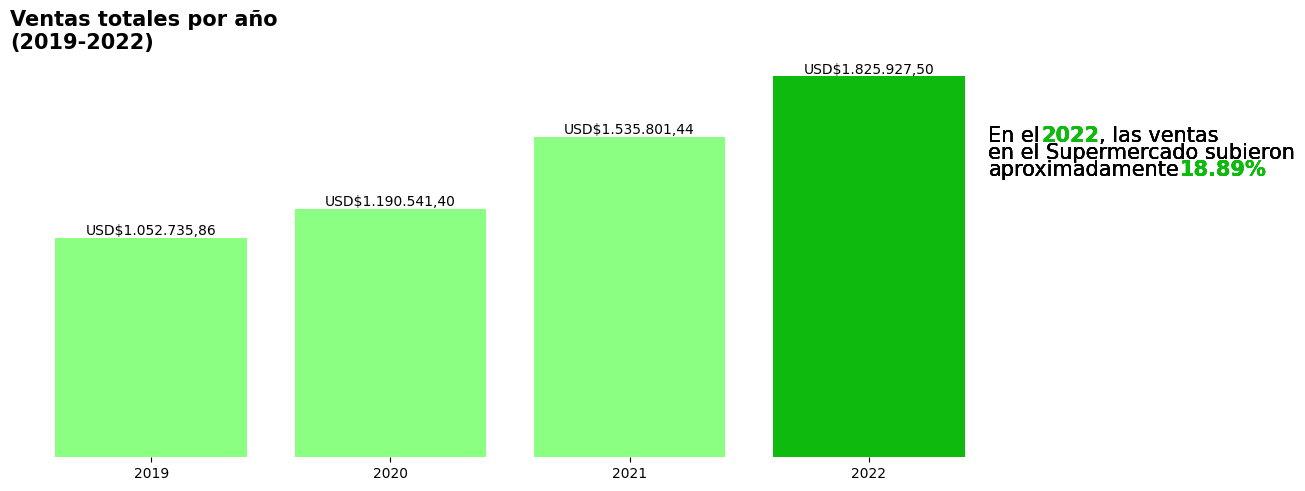

In [ ]:
pregunta_1()

##**Pregunta 2: ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?**

In [ ]:
def pregunta_2():

  # 1.- Preparación de los datos

  df_top_ganancias = df_ventas_limpio.copy()
  df_top_ganancias = df_ventas_limpio.loc[:,["tipo_producto","total_ganancia"]]
  grupo_productos = df_top_ganancias.groupby("tipo_producto")
  total_ganancias_productos = grupo_productos.aggregate({"total_ganancia":"sum"})
  #Ahora para poder seleccionar los 7 productos con mayores ganancias debemos primeramente aplicar un .sort_value(false=ascending) para ordenar de mayor a menor
  total_ganancias_productos = total_ganancias_productos.sort_values(by=["total_ganancia"],ascending=False)
  #Ahora seleccionamos los 7 productos con mayores ganancias a traves del metodo .iloc con el cual haremos la selección a tráves del indice y el numero de la columna
  df_top_ganancias = total_ganancias_productos.iloc[0:7]
  #Por ultimo para poder trabajar que en nuestra visualización donde se vea reflejado los productos de mayor a menor primeramente aplicaremos el metodo de nuevo ,sort_value
  df_top_ganancias = df_top_ganancias.sort_values(by="total_ganancia")
  x = str(int((df_top_ganancias.loc[["Bolsas de basura", "Detergente para ropas"],"total_ganancia"].sum())/1000))

  # 2.- Visualización

  fig, ax = plt.subplots(figsize=(10,4))
  ejeX = df_top_ganancias.index
  ejeY = df_top_ganancias["total_ganancia"]
  # Creamos una lista para cada color que se aplicara a la gráfica y con el signo de suma(+) las concatenamos, de esta forma evitamos tener que repetir
  # muchas veces el mismo color y quede una lina de codigo muy larga.
  colores=["#0C8040"] * 2 + ["#adb5bd"] + ["#0077b6"] * 4
  ax.barh(ejeX, ejeY, color=colores, align='center')
  # Establecemos el titulo.
  ax.set_title("Top 7 productos con las mayor ganancia (2019-2022)",fontsize=15,weight="bold")
  # Ahora haremos que los bordes negros del grafíco desaparezcan, para ello desactivaremos los spines.
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  # Eliminamos los ticks del eje x
  ax.set_xticks([])
  for i,valor in enumerate(df_top_ganancias['total_ganancia']):
    qtd = f'USD${valor:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")
    # Con el siguiente codigo generamos el texto que irá dentro de la barra, lo cual equivale a las ganancias por cada producto de la lista top7, y con los atributos
    # va="center" y ha="right" estaremos centrando el valor y colocandolo a la derecha de la barra.
    ax.text(valor,i,qtd, va='center', ha='right')
    # Vamos a indicar el texto que explica nuestro gráfico.
    ax.text(11.5e4,6.1,"Los datos indican que los 4 productos que generan", fontsize=12)
    ax.text(11.5e4,5.56,"mayor ganancia", fontsize=12,weight="bold")
    ax.text(13.8e4,5.56,"son del departamento de", fontsize=12)
    ax.text(17.05e4,5.56,"Electrónicos.", fontsize=12,color="#0077b6",weight="bold")
    ax.text(11.5e4,4.5,"Podemos notar tambien que el departamento de", fontsize=12)
    ax.text(11.5e4,4,"Productos de Limpieza", fontsize=12,color="#0C8040",weight="bold")
    ax.text(15e4,4,"tiene 2 productos con", fontsize=12)
    ax.text(11.5e4,3.5,"buena margen de ganancia, totalizando", fontsize=12)
    ax.text(16.5e4,3.5,f" ${x}mil", fontsize=12,weight="bold")
    ax.text(11.5e4,3,"durante el periodo analizado.", fontsize=12)

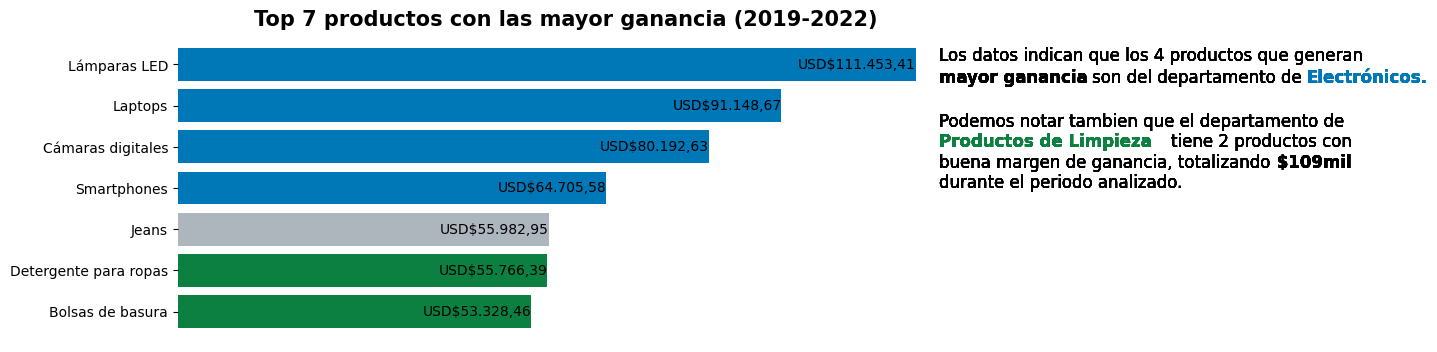

In [ ]:
pregunta_2()

##**Pregunta 3: Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?**

In [ ]:
def pregunta_3():

    # 1.- Preparación de los datos

    df_ventas_año_region = df_ventas_limpio.copy()
    df_ventas_año_region = df_ventas_limpio.copy().loc[:,["fecha_pedido","region","total_venta"]]
    df_ventas_año_region["año"] = df_ventas_año_region["fecha_pedido"].dt.year

    # Ahora solo vamos a seleccionar la columna de año, region y total_venta eliminando con nuestra selección la columana de fecha_pedido
    df_ventas_año_region = df_ventas_año_region.loc[:,["año","region","total_venta"]]
    # Vamos a generar ahora una tabla cruzada con el método .crosstab
    df_ventas_año_region = pd.crosstab(df_ventas_año_region["año"], df_ventas_año_region["region"], df_ventas_año_region["total_venta"], aggfunc="sum")
    df_ventas_año_region = df_ventas_año_region[["Sureste","Centro-Oeste","Noreste","Norte","Sur"]]
    # Por ultimo hallaremos que porcentaje de ventas representa cada región y el mayor de ellos
    # Sumamos todas las ventas por región
    suma_ventas_region = df_ventas_año_region.sum()
    # Hallamos las suma de todas las ventas
    venta_total = suma_ventas_region.sum()
    # Ahora sacaremos el porcentaje por cada region
    sureste =  (suma_ventas_region["Sureste"]/venta_total)*100
    centro_oeste = (suma_ventas_region["Centro-Oeste"]/venta_total)*100
    noreste = (suma_ventas_region["Noreste"]/venta_total)*100
    norte = (suma_ventas_region["Norte"]/venta_total)*100
    sur = (suma_ventas_region["Sur"]/venta_total)*100
    # Ahora hallaremos hallaremos el porcentaje de ventas que representa la suma de las regiones centro-oeste, noreste y sureste
    x = (centro_oeste + noreste +sureste).round(2)

    # 2.- Visualización

    # Estamos genenrando una lista de colores con cuales vamos a trabajar la gráfica
    colores =['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
    # Generamos la gráfica
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15,8), color=colores)
    # Vamos a deshabilitar la visibilidad de los bordes negros.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Establecemos el titulo de la gráfica
    ax.set_title("Ventas del Supermercado por región",fontsize=15,weight="bold",loc="left")
    # Establecemos un subtitulo con el método de añadir texto, y lo posicionamos debajo del titulo
    ax.text(-0.5,18.6e5,f"(2019-2022)",fontsize=12,weight="bold")
    # Estamos eliminando la etiqueta del eje X
    ax.set_xlabel('')

    #Moveremos la leyenda generada
    ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0))
    #Quitaremos los ticks de el ejeY
    ax.set_yticks([])
    # Eliminaremos la marca de los ticks en el eje x y colocaremos sus valores en horizontal
    plt.xticks(rotation='horizontal')
    ax.tick_params(axis='x', length=0)
    for container in ax.containers:
      # Los textos toman el valor de la altura de cada barra, y para mostrarlo en el formato de miles de divideremos este valor entre 1000 y lo convertiremos
      # en un entero, por ultimo añadiremos dentro del f-string una K la cual representa los miles es decir 900k significa novecientos mil (900.000)
      labels = [f'{int(bar.get_height()/1000)}K' for bar in container]
      ax.bar_label(container, label_type='center', labels=labels)
      ax.text(3.35,15.5e5,f"{x}%",fontsize=12, color="#0077b6",weight="bold")
      ax.text(3.35,14.2e5,"de las ventas en el Supermercado\nestán concentradas en las regiones",fontsize=12)
      ax.text(3.35,13.6e5,"Suereste, Noreste",fontsize=12,weight="bold")
      ax.text(3.965,13.6e5,"y",fontsize=12)
      ax.text(3.35,13e5,"Centro-Oeste",fontsize=12,weight="bold")
      ax.text(3.35,12.5e5,"desde el 2019.",fontsize=12)

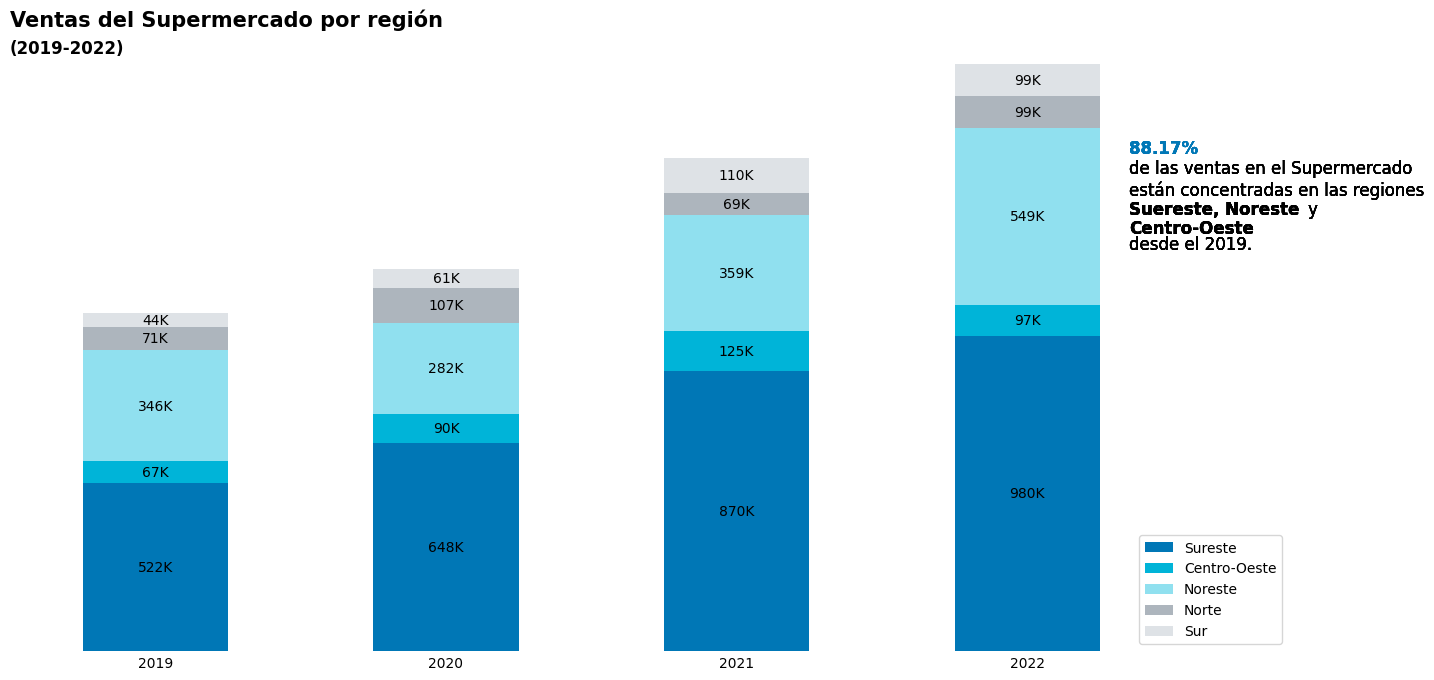

In [ ]:
pregunta_3()

##**Pregunta 4: ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?**

In [ ]:
def pregunta_4():

    # 1.- Preparación de los datos

    df_modo_envio = df_ventas_limpio.copy().loc[:,["modo_envio","segmento_cliente"]]
    df_modo_envio = pd.crosstab(df_modo_envio["modo_envio"],df_modo_envio["segmento_cliente"]).sort_values("B2B")
    # El primer .sum() sumara todos los valores de cada columna, el segundo sumara los resultados de ambos
    suma = (df_modo_envio.sum()).sum()
    # Ahora hallaremos el porcentaje que representa entregas estandar del total de los tipos de entregas
    porcentaje_entrega_estandar_total = (((df_modo_envio.loc['Entrega estándar','B2B'] + df_modo_envio.loc['Entrega estándar','B2C']) / suma) * 100).round(2)

    # 2.- Visualización

    fig, ax = plt.subplots(figsize=(10,4))
    ejeX= df_modo_envio.index
    eje1Y= df_modo_envio["B2B"]
    eje2Y= df_modo_envio["B2C"]
    colores=['#0077b6','#CDDBF3']
    ax.barh(ejeX, eje1Y, color=colores[0])
    ax.barh(ejeX, eje2Y, left=eje1Y, color=colores[1])
    # Titulo del gráfico y luego el subtitulo
    ax.set_title("Método de envío más utilizado por los clientes B2B/B2C (2019-2022)",fontsize=12,weight="bold")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    #Eliminando los ticks en el eje X
    for container in ax.containers:
      ax.bar_label(container,label_type='center', weight="bold")
      ax.text(46e2,2,"El método de entrega preferido por los clientes B2B/B2C\nen el perido de tiempo (2019-2022), es el método\n'Entrega estándar' y representa el",fontsize=12)
      ax.text(62.7e2,2,f"{porcentaje_entrega_estandar_total}% de los pedidos",fontsize=12,weight="bold")
      ax.text(46e2,1.75,"lo que indica que no hay diferencia en los segmentos.",fontsize=12)
      ax.text(0.2e2,3.45,"B2B|",fontsize=10,weight="bold", color ='#0077b6')
      ax.text(2.32e2,3.45,"B2C",fontsize=10,weight="bold",color ='#C4D2E9')

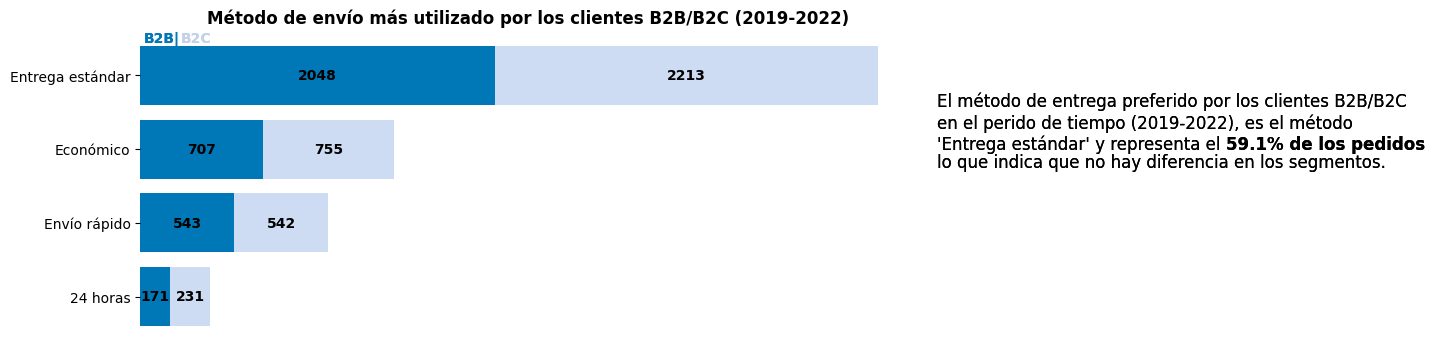

In [ ]:
pregunta_4()

##**Pregunta 5: ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?**

In [ ]:
def pregunta_5():

  # 1.- Preparación de los datos

  # Realizamos la copia del df_ventas_limpio con el método .copy()
  df_ventas_sp = df_ventas_limpio.copy()
  # Ahora seleccionamos todas las filas que hagan referencia a las ventas en el estado de São Paulo, primero hacemos una selección del df_ventas_sp,
  # luego dentro de esta hacemos una selección de la columana estado y aplicamos el condicional == "São Paulo" para que todos los que cumplan con esta condición se guarden
  # en el df_ventas_sp
  df_ventas_sp['fecha_pedido']= pd.to_datetime(df_ventas_sp['fecha_pedido'])
  df_ventas_sp = df_ventas_sp[(df_ventas_sp["estado"]=="São Paulo")]
  # Con el método loc seleccionamos todas las filas y seleccionamos la columna fecha_pedido y fecha total, de esta manera tenemos todas las ventas de São Paulo y su fecha de pedido
  df_ventas_sp = df_ventas_sp.loc[:,["fecha_pedido","total_venta"]]
  df_ventas_sp = df_ventas_sp.set_index("fecha_pedido")
  # Ahora agrupamos por trimestres con el metodo .resample("Q") y sumamos lso valores de cada trimestre con .agg("sum")
  df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
  # Llevamos lo redondeamos y llevamos a escalas de miles, para ello primero dividimos entre 100 y luego le aplicamos el método round(2)
  df_ventas_sp = (df_ventas_sp/1000).round(2)

  # 2.- Visualización

  # Creamos una figura y un eje y establecemos tambien el tamaño del gráfico
  fig, ax = plt.subplots(figsize=(14,4))
  # Creamos una lista booleana con valores false y true, el orden que tendran será equivalente al orden en el que queremos que se muestre
  # los marcadores en los trimestres con mayores ganancias, los cuales en nuestro caso son el 4 trimestre de cada año los que registran
  # mayores ventas, por tanto el orden sería 3 falsos y uno verdadero y así por cada año, por tanto el trimestre que toma el valor true
  # es donde se colocara la marca
  lista =[False]*3+[True]+[False]*3+[True]+[False]*3+[True]+[False]*3+[True]
  # Establecemos nuestros eje X y Y
  ejeX = df_ventas_sp.index
  ejeY = df_ventas_sp["total_venta"]
  #Crearemos un variable etiqueta, para colocar debajo del ejeX, como un segundo eje su nombre será ejeX2
  ejeX2 = "|             2019           |              2020            |              2021            |             2022            |"
  # Con esta lína grafícamos una gráfica tipo plot, donde tomara los valores ejeX y eje Y respectivamente, y donde marker"o" es el tipo de
  # marcador que queremos usar y markevery serían los lugares donde se colocaran las marcas.
  ax.plot(ejeX,ejeY,marker="o",markevery=lista)
  # Eliminamos los ticks del eje Y
  ax.set_yticks([])
  # Establecemos como nuestro eje X los mese de Mar, Jun, Set y diciembre los cuales representaran el final de cada trimestre, y esto
  # sera nuestras estiquetas del eje X
  x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
  ax.set_xticks(df_ventas_sp.index)
  ax.set_xticklabels(x_labels, ha="center")
  ax.set_xlabel(ejeX2, fontsize=16.7)
  # Vamos a deshabilitar la visibilidad de los bordes negros.
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  #Vamos a generar grid
  ax.grid(True)
  # Titulo del gráfico y luego el subtitulo
  ax.set_title("Ventas por trimestre en el estado de São Paulo\nDe 2019 a 2022(en miles de dólares)",fontsize=15,weight="bold",loc="left")
  # ax.text(50,1e2,"De 2019 a 2022(en miles de dólares)",fontsize=12,weight="bold")
  # Para colocar los valores en la posición de cada trimestre
  for i in range(3, len(df_ventas_sp["total_venta"]), 4):
    valor = str(df_ventas_sp["total_venta"][i])
    ax.text(ax.get_xticks()[i], df_ventas_sp["total_venta"][i], f"  ${valor}mil (4to Trimestre)",weight="bold",color="#005F91")
    ax.text(19.38e3,150,f"Podemos observar el crecimiento de las ventas en intervalos trimestrales. En el 4to\ntrimestre de cada año se genera un pico en las ventas, lo que indica que en esta\népoca es cuando los clientes compran más en el supermercado. Puede deberse a\nmucho factores, cobro de bonos, épocas de fiestas, promociones de temporada\nentre otro factores que pueden incentivar al cliente a gastar al final de cada año", fontsize=12)

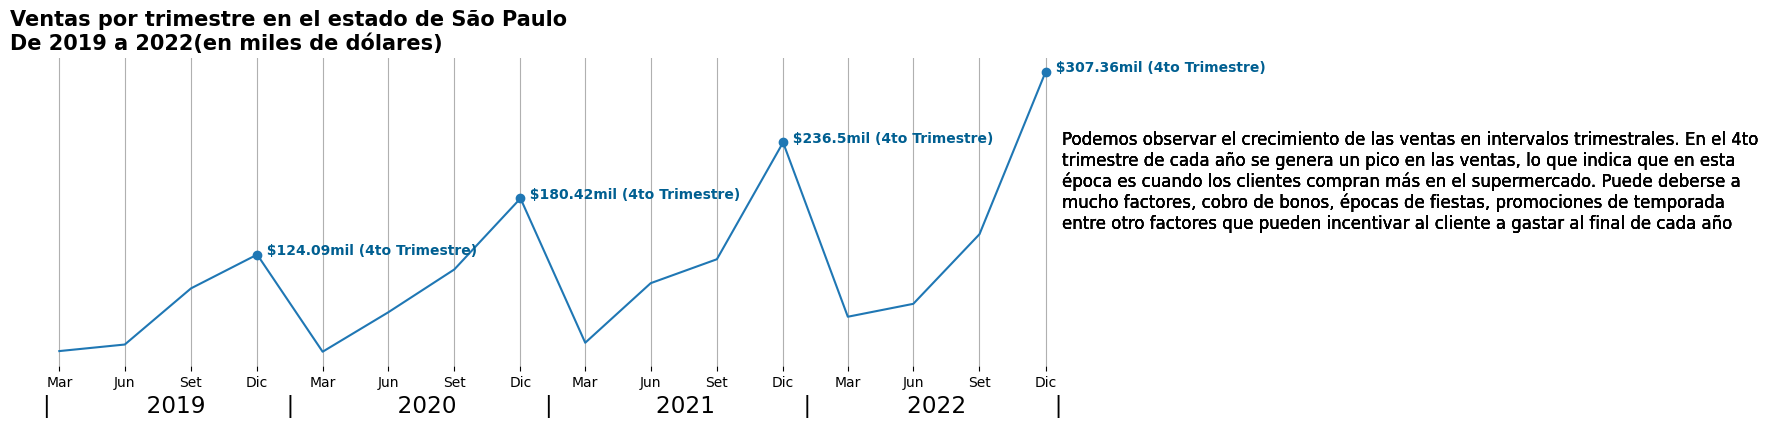

In [ ]:
pregunta_5()

##**Inshight 6: ¿Cuál es el cliente de mayor relevancia para las ganancias del Supermercado en el periodo (2019-2022)?(Añadido)**

In [ ]:
def pregunta_6():

  # 1.- Preparación de los datos

  # Realizamos la copia del df_ventas_limpio con el método .copy()
  df_cliente_ganancias = df_ventas_limpio.copy().loc[:,["segmento_cliente","total_ganancia"]]
  grupo_cliente = df_cliente_ganancias.groupby("segmento_cliente")
  total_ganancias_cliente = grupo_cliente.aggregate({"total_ganancia":"sum"})

  # 2.- Visualización

  fig, ax = plt.subplots(figsize=(10,5))
  ax = fig.add_axes([0,0,1,1])
  colores=["#8AE4A4","#2CFC4B"]
  ejeX= total_ganancias_cliente.index
  ejeY= total_ganancias_cliente["total_ganancia"]
  barras = ax.bar(ejeX, ejeY, color=colores, width=0.8)
  # Ahora haremos que los bordes negros del grafíco desaparezcan, para ello desactivaremos los spines.
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  # Colocar el título
  ax.set_title("Ganancias totales por segmento de clientes B2B/B2C (2019-2022)",fontsize=15,weight="bold")
  # Ahora haremos que no aparezca nada en el eje Y eliminando los ticks y sus valores
  ax.set_yticks([])
  # Para el eje X usaremos el ancho de las barras y lo divideremos entre 2 para que los años se posicionen en cada barra para cada barra en el conjuntos de barras haremos esto
  # recorrido.
  ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in barras])
  ax.set_xticklabels(ejeX)
  for bar in ax.patches:
    valor = bar.get_height()
    # :,.2f este es un formate numeros, es una sintaxis en python que permite hacer el formateo de miles a los números. Al aplicarlo colocara una coma donde debería
    # de haber un separador es decir 1,302,123. Sin embargo como queremos aparezca un punto en vez de una coma, entonces primero remplazamos con .replace() las comas
    # por x o cualquier otra letra, luego reemplazamos el . que representa el separador de decimales por un punto, y por ultimo reemplazamos las x por puntos y listo
    # nos queda el formato de 1.302.123,0 por ejemplo.
    qtd = f'USD${valor:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")
    ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd, ha='center', va='bottom',weight="bold",fontsize=13)
    ax.text(1.42,25e4,f"El total de ganancias generado por las ventas según el tipo de cliente(B2B ó B2C)\nes aproximadamente igual, es decir hay poca diferencia entre las ganancias\ngeneradas por cada segmentos de cliente. Cada uno aporta una cantidad\nconsiderable de ingresos, por tanto son de gran relevancia para el supermercado.", fontsize=15)

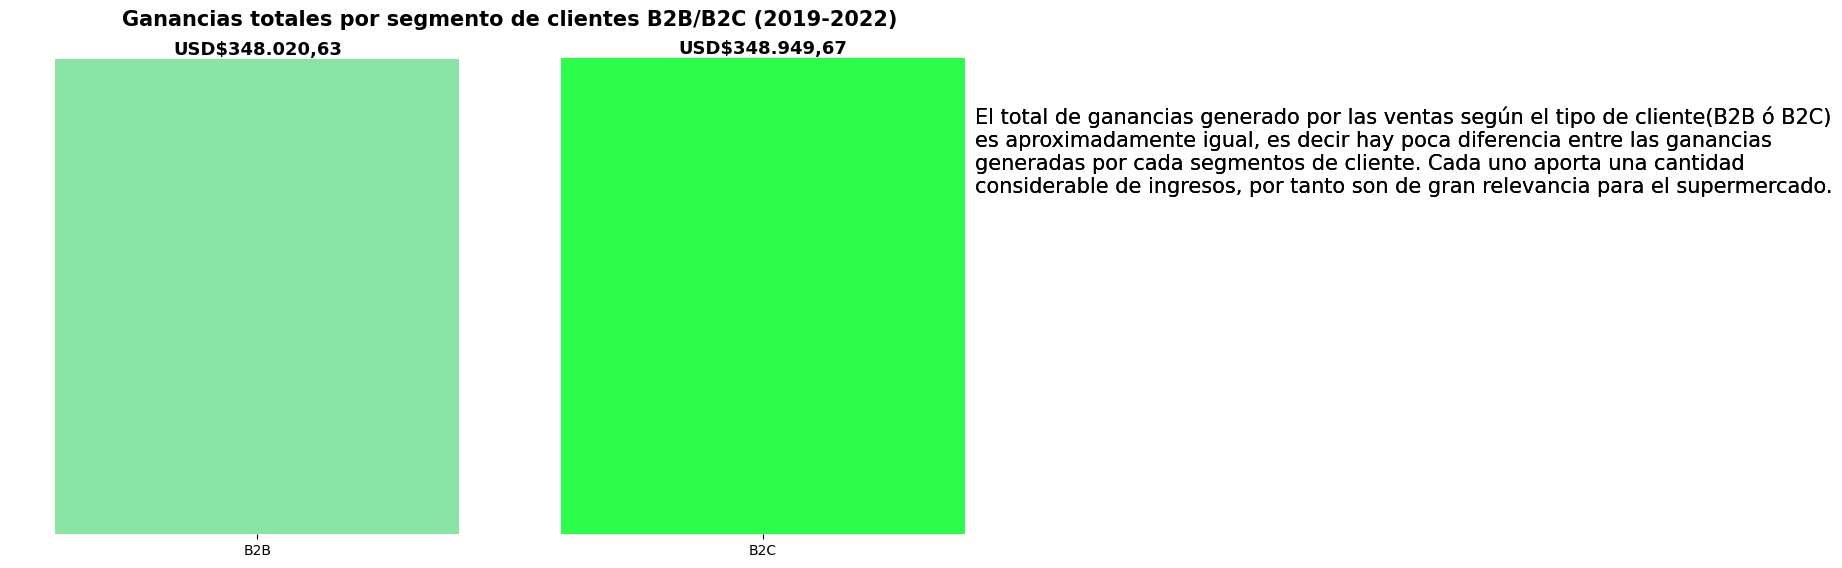

In [ ]:
pregunta_6()